In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("shape of our training input: {}".format(x_train.shape))
#print(x_train[0])

shape of our training input: (60000, 28, 28)


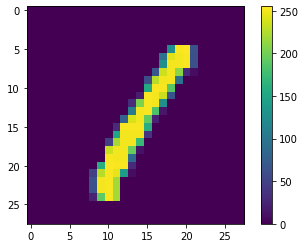

In [4]:
plt.imshow(x_train[3])
plt.colorbar()
plt.show()

In [5]:
def ourModel(inputs):
    first_layer = tf.layers.dense(inputs=inputs, units=128,activation = tf.nn.relu)
    
    second_layer = tf.layers.dense(inputs=first_layer, units=64, activation=tf.nn.relu)
    
    hidden_state = tf.layers.dense(inputs=second_layer, units=32, activation=tf.nn.relu)
    
    third_layer = tf.layers.dense(inputs=hidden_state, units=64, activation=tf.nn.relu)
    
    fourth_layer = tf.layers.dense(inputs=third_layer, units=128, activation=tf.nn.relu)
    
    output_layer = tf.layers.dense(inputs=fourth_layer, units=784, activation=tf.nn.sigmoid)
    
    return output_layer

In [6]:
inputs=tf.placeholder(tf.float32, shape=[None, 784])
labels =tf.placeholder(tf.float32, shape=[None, 784])

outputs = ourModel(inputs)

#optimizers. You can look into these in your own time but for this notebook, you can consider these standard for classification
loss = tf.reduce_mean(tf.nn.l2_loss(tf.subtract(outputs,inputs)))

#And now we have to optimize this loss
trainer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

#Let's also define accuracy for our viewing
#_, accuracy = tf.metrics.accuracy(tf.argmax(labels, 1), tf.argmax(outputs, 1))

#Let's set some hyperparamaters for batch size and epochs
batch_size = 128
num_epochs = 10

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((x_train.shape[0],784)) #TODO: keep reading until sess.run then uncomment and finish this. There are many ways of doing this task but look into a reshape operation in numpy
x_test = x_test.reshape((x_test.shape[0],784))

init=tf.global_variables_initializer() #initializer of all variables (The random weights of the model before training).
local_init = tf.local_variables_initializer() #This isn't always needed but tf.metrics.accuracy has local variables to initialize

In [ ]:
with tf.Session() as sess:
    #each call to sess.run() runs the approriate input within our tf session
    sess.run(init)
    sess.run(local_init)
    print("Starting to run session...")
    for epoch in range(num_epochs): #iterate through each epoch
        for i in range(x_train.shape[0]//batch_size): #iterate through the number of batches we can make from our samples
            batch_images = x_train[i*batch_size:(i+1)*batch_size]

            _ = sess.run([trainer], feed_dict={inputs: batch_images, labels: batch_images})
            
        test_batch_images = x_test[i*batch_size:(i+1)*batch_size]
        lss = sess.run([loss], feed_dict={inputs: test_batch_images, labels: test_batch_images})
        print('Epoch',epoch,'accuracy:',lss)